In [1]:
import pandas as pd
from tabulate import tabulate

In [2]:
df = pd.read_csv("data.csv")

# Frequency as a function of time ($\frac{cycles}{minute}$)

In [3]:
import matplotlib.pyplot as plt

,frequency
1,45.74
2,56.50
3,46.40
4,56.86
5,56.86
7,45.74
8,56.86
9,55.81
10,50.59
11,47.89


        std     mean
--  -------  -------
 0  5.56273  51.3005


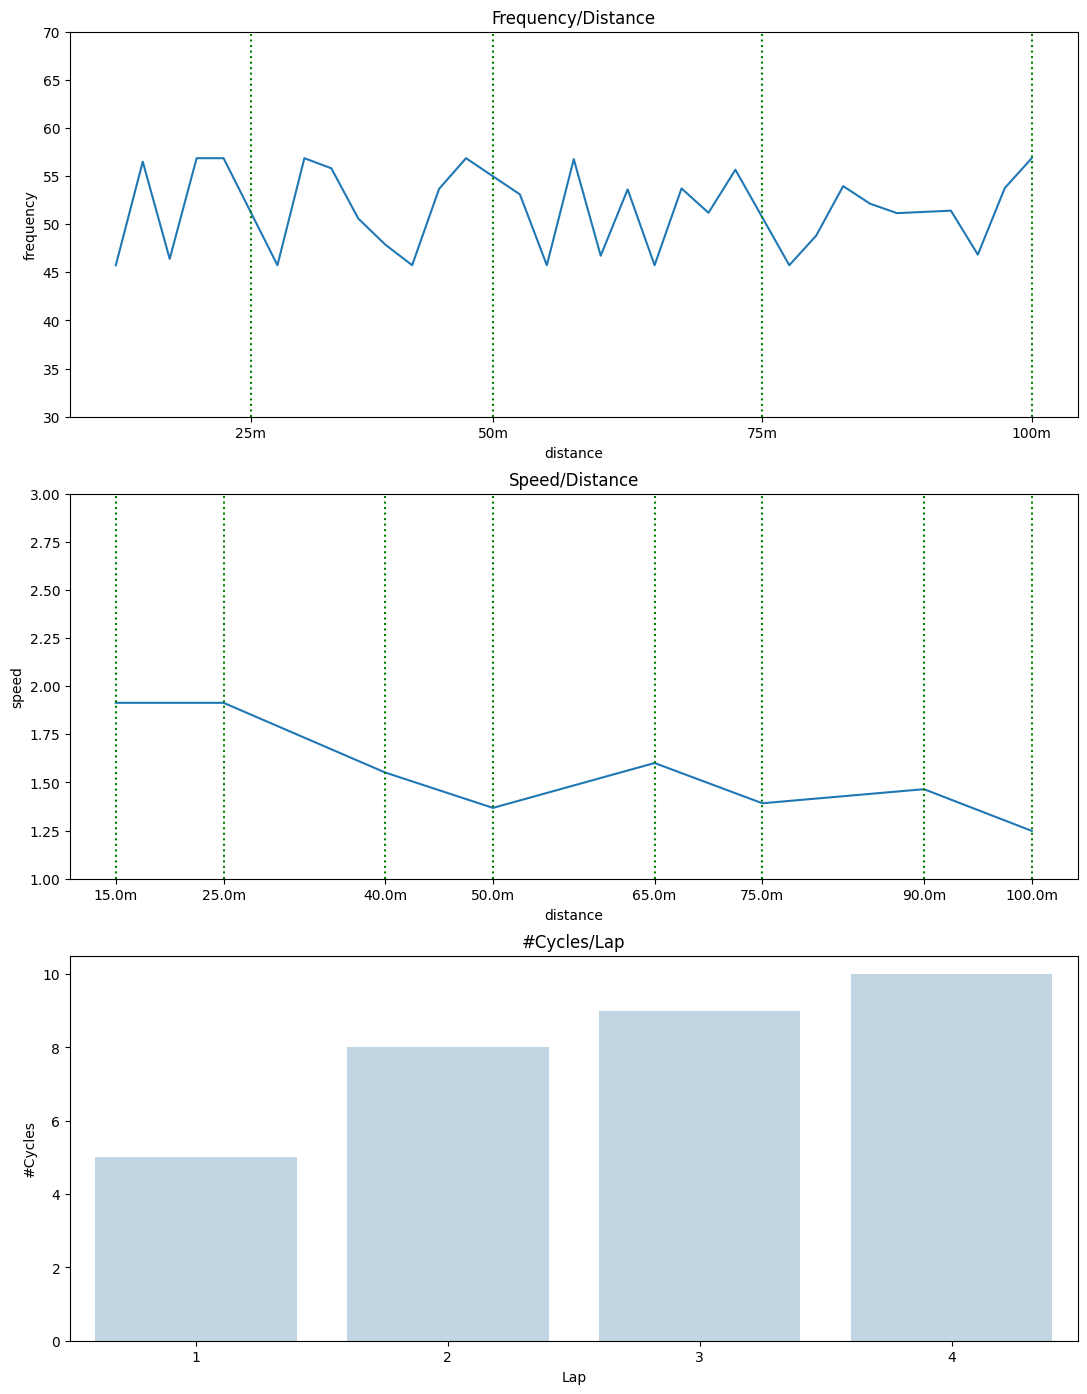

In [4]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
from utils import race_report as RR
from utils import plotting

# 25 for SCM, 50 for LCM.
LAP_LEN = 25

fig, ax = plt.subplots(nrows=3, figsize=(13, 17))

# Distance ticks/labels
lap_indices = RR.get_bo_indices(df)
distances = [RR.format_distance((i + 1)*LAP_LEN) for i in range(len(lap_indices))]

# Frequency Dataframe.
df_frequency = df[[RR.COL_MES, RR.COL_TIME]][df[RR.COL_MES] == RR.VAL_CYCLE]
df_frequency.loc[:, RR.COL_Y] = 60 / df[RR.COL_TIME]

# Speed Dataframe.
df_speed = RR.calc_speed(df, lap_indices)

# DPS.
(stats, df_frequency) = RR.calc_frequency(df_frequency)
display(df_frequency.drop(["interval-time", RR.COL_X, RR.COL_MES], axis=1))
table = tabulate(pd.DataFrame({"std": [stats.std], "mean": [stats.mean]})
                 , tablefmt='text'
                 ,headers=["std", "mean"])
print(table)

# Plotting.

#
# Distances
#
plotting.plot_frequency(df_frequency, ax=ax[0], lap_indices=lap_indices, distances=distances)

#
# Speed
#
plotting.plot_speed(df_speed, ax=ax[1])

#
# DPS
#
plotting.plot_dps(df, ax=ax[2])
plt.show()